# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,MeanShift,estimate_bandwidth
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

ModuleNotFoundError: No module named 'matplotlib'

# Importing DataSet

In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [188]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [189]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
45,46,Female,24,39,65
41,42,Male,24,38,92
135,136,Female,29,73,88
174,175,Female,52,88,13
108,109,Male,68,63,43
120,121,Male,27,67,56
51,52,Male,33,42,60
6,7,Female,35,18,6
54,55,Female,50,43,45
16,17,Female,35,21,35


In [190]:
df.shape

(200, 5)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [192]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Checking Null and Duplicate Value

In [193]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [194]:
df.duplicated().sum()

0

In [195]:
df=df.drop(columns=['CustomerID'])

# Exploratory Data Analysis(EDA)

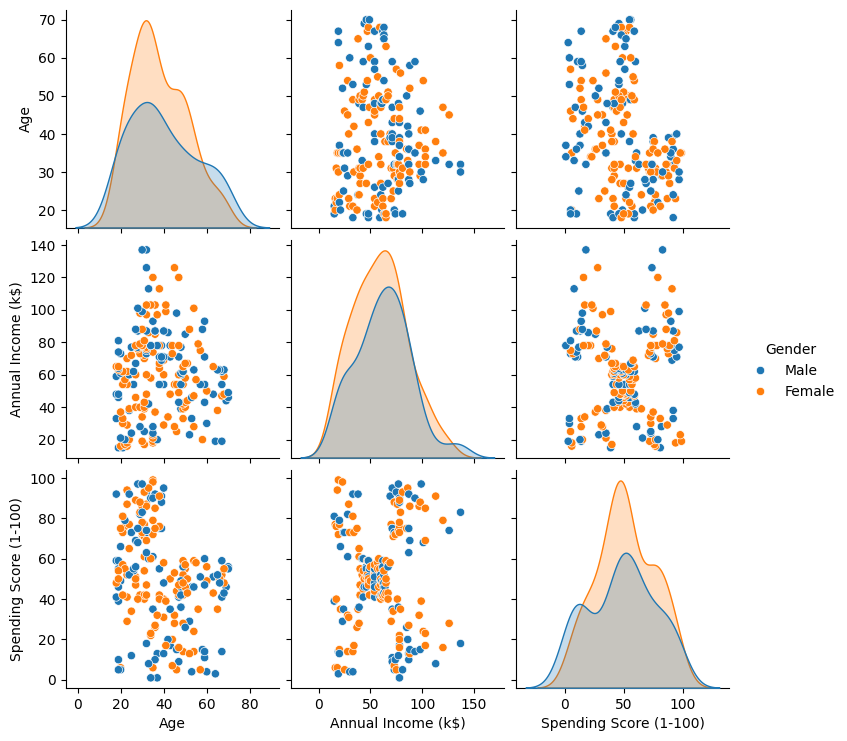

In [196]:
sns.pairplot(df,hue='Gender')

# Feature Encoding  

In [197]:
le=LabelEncoder()

In [198]:
df['Gender']=le.fit_transform(df['Gender'])

In [199]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Feature Scaling

In [200]:
features=df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [201]:
sc=StandardScaler()

In [202]:
scaled_features=sc.fit_transform(features)

In [203]:
df = pd.DataFrame(scaled_features, columns=features.columns)

In [204]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# KMean Clustering

In [205]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Elbow Method

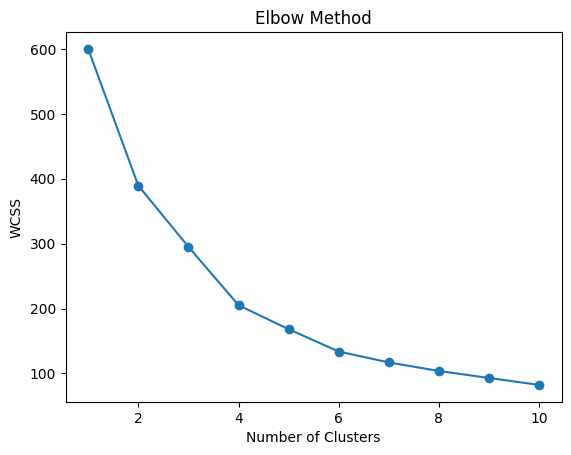

In [206]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [207]:
kmeans=KMeans(n_clusters=5,n_init=10,random_state=42)

In [208]:
df['Kmeans_cluster']=kmeans.fit_predict(df)

In [209]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_cluster
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1


In [210]:
df.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_cluster
47,-0.850435,-0.784763,-0.124229,1
162,-1.424569,0.780183,-1.754735,3
80,1.302565,-0.250391,0.031057,4
31,-1.281035,-1.166458,0.885132,1
85,0.656665,-0.250391,-0.163051,4
193,-0.061002,2.001605,1.583920,2
141,-0.491602,0.551167,1.661563,2
81,-0.061002,-0.250391,0.186343,1
52,-0.563369,-0.670255,0.147522,1
17,-1.352802,-1.509983,0.613381,1


Visualization

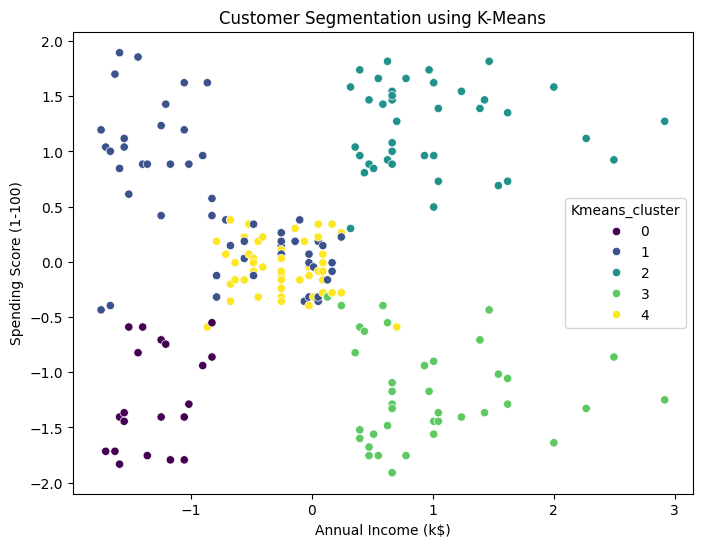

In [211]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Kmeans_cluster'], palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.show()

# Hierarchical Clustering

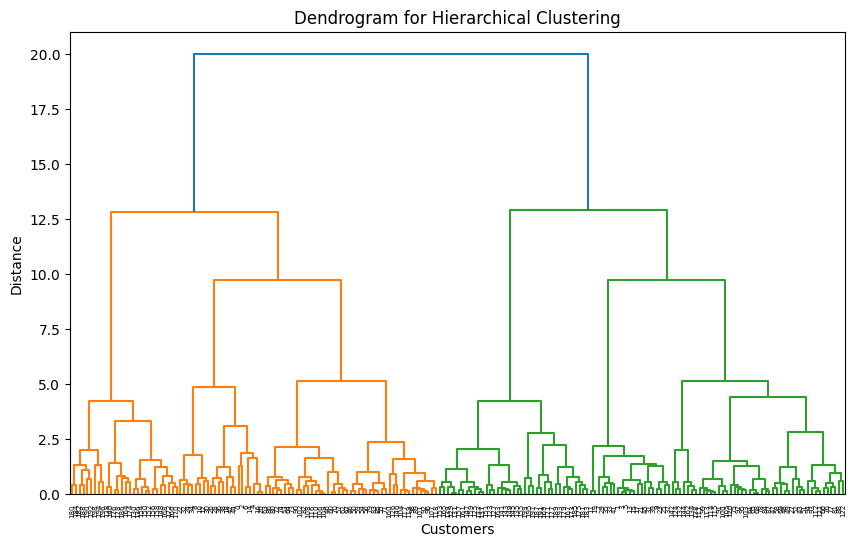

In [212]:
plt.figure(figsize=(10, 6))
linked = linkage(scaled_features, method='ward')
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [213]:
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df)

In [220]:
df.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_cluster,Hierarchical_Cluster,DBSCAN
81,-0.061002,-0.250391,0.186343,1,0,-1
149,-0.348068,0.665675,1.545098,2,2,9
60,2.235532,-0.555747,0.225165,4,1,2
36,0.226065,-1.013780,-1.288876,0,4,-1
100,-1.137502,0.054964,-0.357158,1,0,6
104,0.728432,0.054964,0.225165,4,1,3
186,1.087265,1.543572,-1.017125,3,3,-1
1,-1.281035,-1.738999,1.195704,1,0,0
18,0.943732,-1.433644,-0.823017,0,4,-1
135,-0.706902,0.474828,1.467455,2,2,9


Visualization

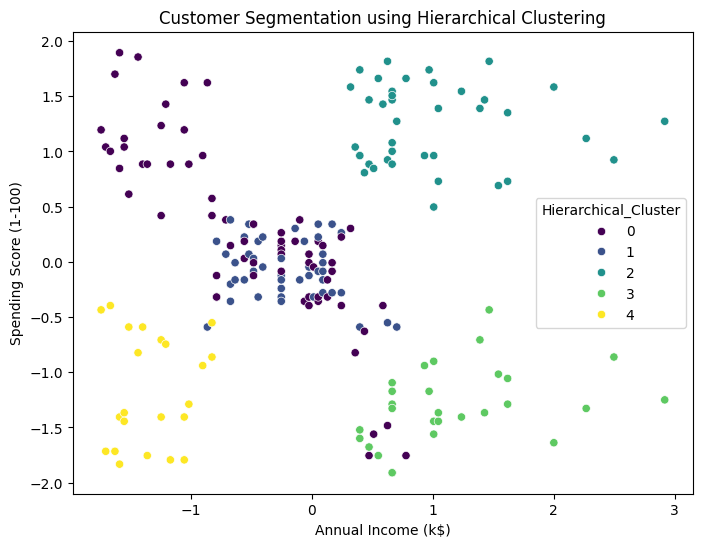

In [214]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Hierarchical_Cluster'], palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using Hierarchical Clustering')
plt.show()

# DBSCAN Clustering

In [218]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['DBSCAN'] = dbscan.fit_predict(df)

In [221]:
df.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_cluster,Hierarchical_Cluster,DBSCAN
7,-1.137502,-1.624491,1.700384,1,0,-1
141,-0.491602,0.551167,1.661563,2,2,9
60,2.235532,-0.555747,0.225165,4,1,2
21,-0.993969,-1.395474,0.885132,1,0,0
131,0.010765,0.398489,0.962775,2,2,-1
186,1.087265,1.543572,-1.017125,3,3,-1
65,-1.496335,-0.479408,0.341630,1,0,-1
192,-0.419835,2.001605,-1.638270,3,3,-1
50,0.728432,-0.708425,0.069879,4,1,1
43,-0.563369,-0.822933,0.419273,1,0,-1


Visualization

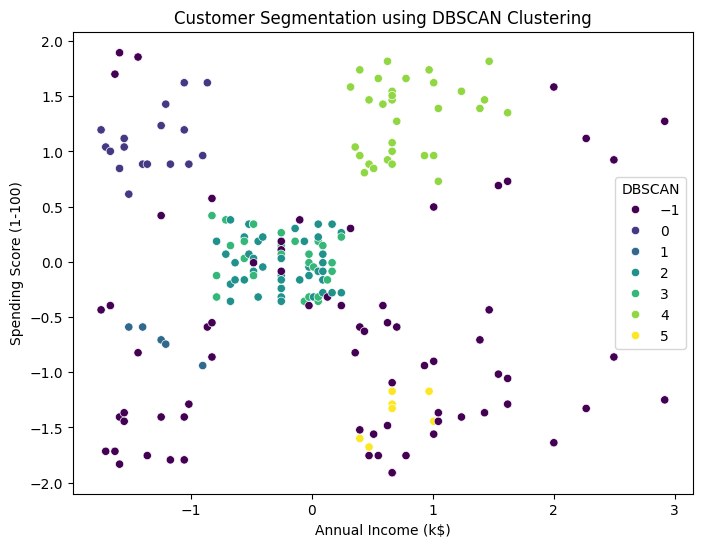

In [217]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['DBSCAN'], palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using DBSCAN Clustering')
plt.show()

# MeanShift Clustering

In [223]:
bandwidth=estimate_bandwidth(df,quantile=0.2)

In [225]:
mean_shift=MeanShift(bandwidth=bandwidth)
df['MeanShift']=mean_shift.fit_predict(df)

In [226]:
df.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),Kmeans_cluster,Hierarchical_Cluster,DBSCAN,MeanShift
110,1.876699,0.093133,0.069879,4,1,7,1
64,1.733166,-0.479408,0.031057,4,1,2,0
76,0.441365,-0.250391,0.108700,4,0,-1,0
61,-1.424569,-0.555747,0.186343,1,0,-1,0
27,-0.276302,-1.242797,0.419273,1,0,-1,0
153,-0.061002,0.665675,1.001596,2,2,-1,0
155,-0.850435,0.665675,1.506277,2,2,-1,0
49,-0.563369,-0.784763,-0.318337,1,0,-1,0
190,-0.348068,1.619911,-1.055946,3,3,-1,0
83,0.513132,-0.250391,-0.240694,4,1,3,1


Visualization

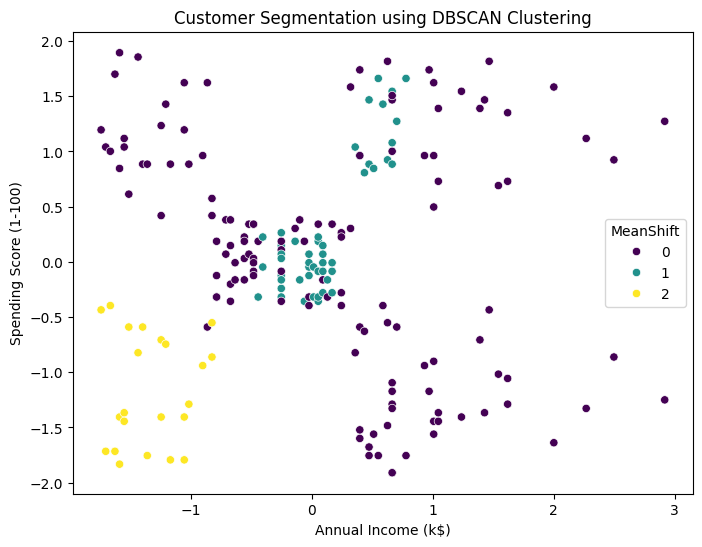

In [227]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['MeanShift'], palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using DBSCAN Clustering')
plt.show()